In [1]:
%matplotlib inline
import numpy as np
import cv2
from incisorseg.dataset import Dataset,LeaveOneOutSplitter,load_image,load_landmark
from incisorseg.utils import *
from asm.shape import Shape, ShapeList
from asm.shapemodel import ShapeModel
from asm.greymodel import GreyModel
from asm.model import ActiveShapeModel

# Reading the data

In [2]:
data = Dataset('../data/')

# Ideal case - testing the shape model fitting

3 32583.3505499


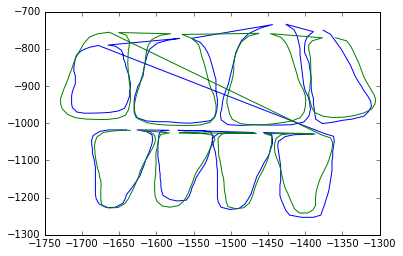

3 32068.8920118


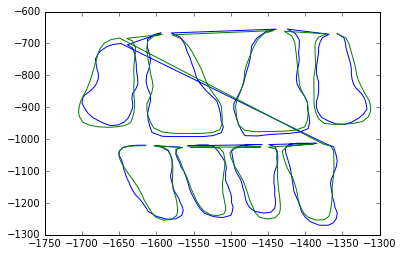

4 32611.6581748


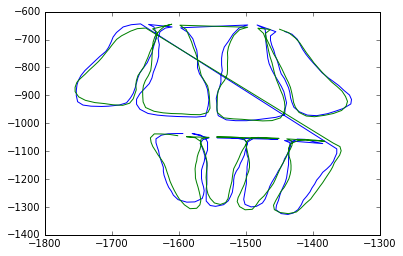

3 32500.0174153


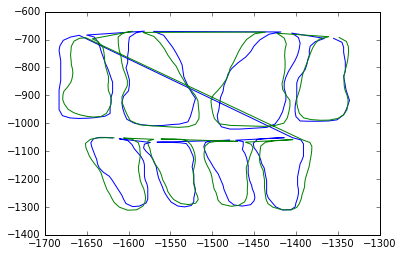

4 32677.8944483


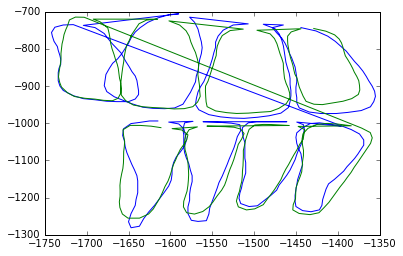

3 32205.5892233


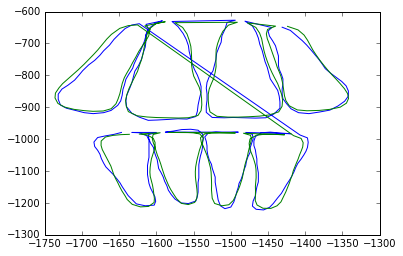

4 32187.4232532


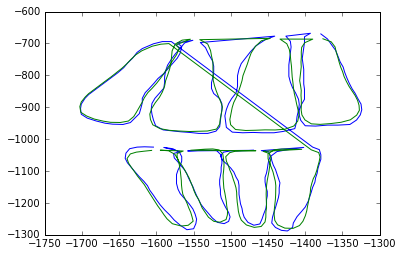

4 31561.0818141


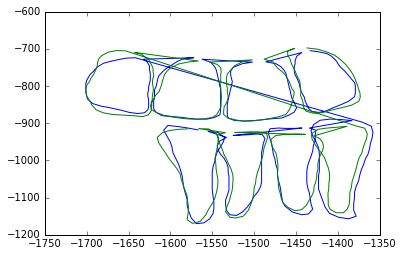

4 33121.2109359


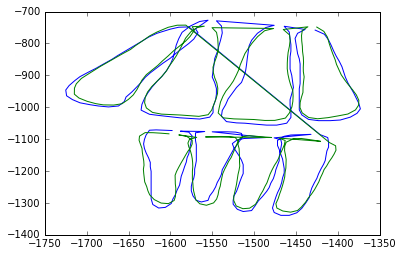

3 30818.440565


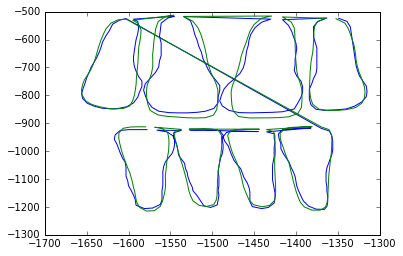

3 31634.4162599


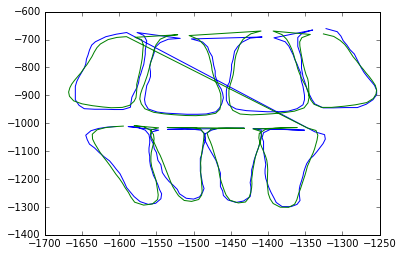

4 32432.435731


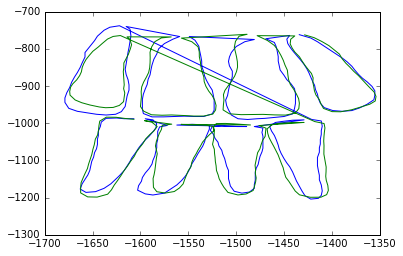

3 31131.8697871


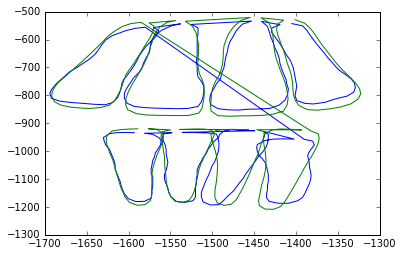

3 32197.4320065


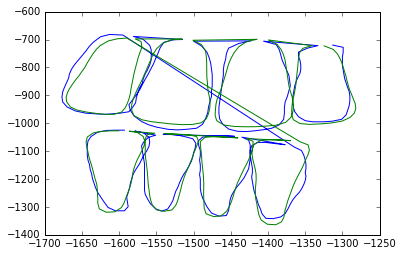

3 32296.227992


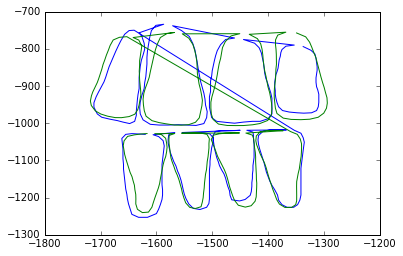

3 32342.063861


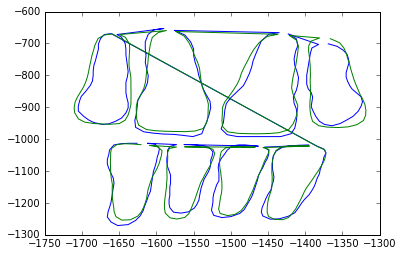

3 31551.5356118


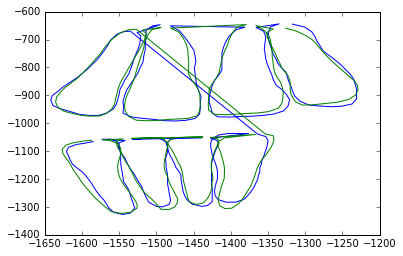

3 32553.2848692


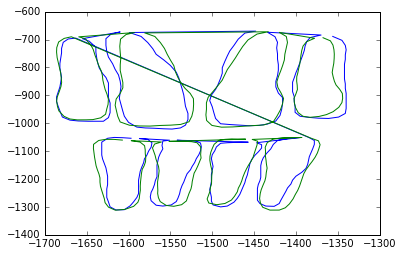

4 31821.785424


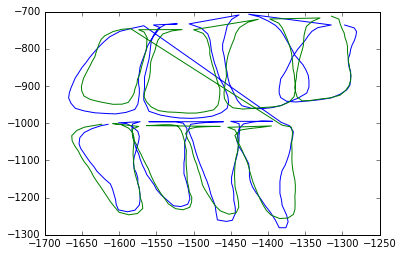

3 31446.4198044


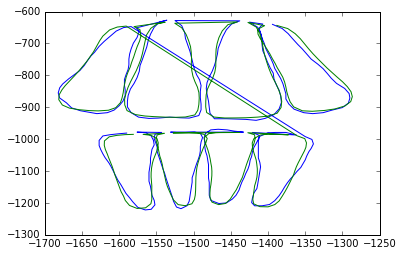

4 32429.4204756


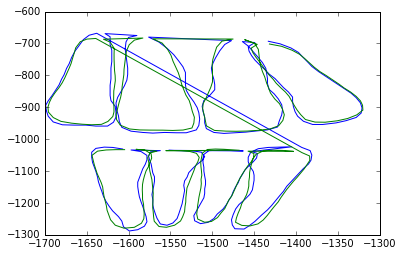

4 31608.2503045


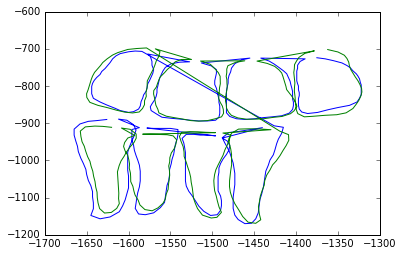

4 32603.6635263


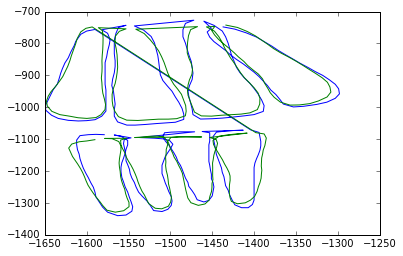

3 31697.8878745


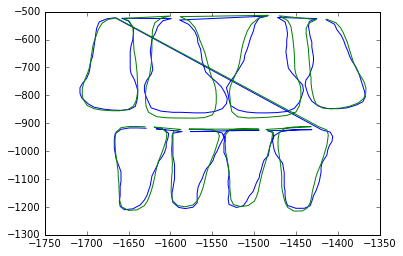

3 32883.6464621


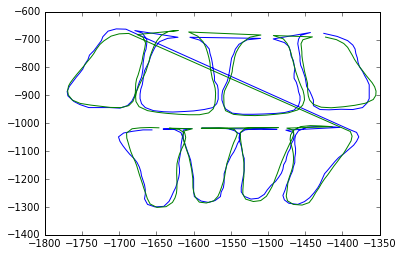

4 32038.389171


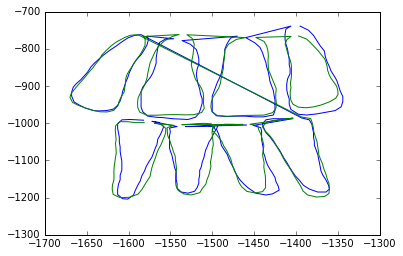

3 31381.9829228


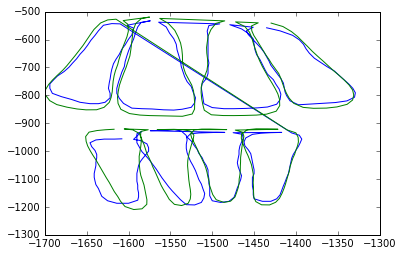

3 32987.0071083


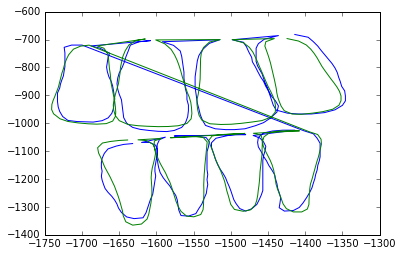

In [3]:
for split in LeaveOneOutSplitter(data):
    training_images,training_landmarks,training_segmentations = split.get_training_set()
    test_image,test_landmark,test_segmentation = split.get_test_example()
    shape_model = ShapeModel(training_landmarks)
    fitted_shape,error,num_iters =shape_model.fit(test_landmark)
    print num_iters,error
    plot_shapes([test_landmark,fitted_shape])

# Ideal case - testing the grey model fitting

In [5]:
for split in LeaveOneOutSplitter(data):
    training_images,training_landmarks,training_segmentations = split.get_training_set()
    test_image,test_landmark,test_segmentation = split.get_test_example()
    grey_model = GreyModel(training_images, training_landmarks, number_of_pixels_model=60, pca_variance_captured=0.9,
                 normal_point_neighborhood=4,
                 use_gradient=False, normalize=False)
    fitted_shape,error_list =grey_model.search(test_image,test_landmark,search_number_of_pixels=120)
    plot_shapes([test_landmark,fitted_shape])

TypeError: object of type 'float' has no len()

In [4]:
i = 0
for split in LeaveOneOutSplitter(data):
    if i > 0:
        break
    training_images,training_landmarks,training_segmentations = split.get_training_set()
    test_image,test_landmark,test_segmentation = split.get_test_example()
    scaled_training_images = training_images
    scaled_training_landmarks = training_landmarks
    scaled_test_image = test_image
    for j in range(4):
        scaled_test_image = cv2.pyrDown(scaled_test_image)
        scaled_training_images = [cv2.pyrDown(image) for image in scaled_training_images]
        scaled_training_landmarks = ShapeList([shape.pyr_down() for shape in scaled_training_landmarks])
        if j==3:
            #print scaled_training_landmarks.bounding_box()
            #print scaled_training_images[0].shape
            model = ActiveShapeModel(scaled_training_images,scaled_training_landmarks,grey_model_number_of_pixels=5,
                 grey_model_search_number_of_pixels=15,grey_model_use_gradient=False,
                 grey_model_normalize=False,)
            new_shape_combined,fit_error,_ = model.fit(scaled_test_image,1e-7,50)
            imshow2(overlay_shapes_on_image(scaled_test_image,[new_shape_combined.round()]))
            plot_shapes([new_shape_combined])

    #print split.get_dice_error_on_test(test_landmark)
    #print split.get_dice_error_on_test(model.initial_shape())
    #print split.get_dice_error_on_test(new_shape_combined)
    i +=1

TypeError: object of type 'float' has no len()